In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
country = pd.read_csv("002 3.01.Country-clusters.csv")

In [3]:
country.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


<Axes: xlabel='Longitude', ylabel='Latitude'>

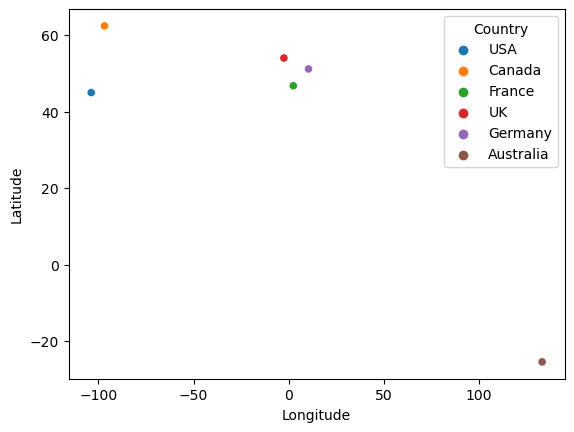

In [4]:
sns.scatterplot(data=country,x='Longitude',y='Latitude',hue='Country')

In [5]:
country['Language'] = country['Language'].map({'English':1,'French':2,'German':3})

In [6]:
x = country[['Language']]
x

,Language
0,1
1,1
2,2
3,1
4,3
5,1


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

In [8]:
kmeans.fit(x)

E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
kmeans.predict(x)

array([0, 0, 2, 0, 1, 0])

In [10]:
country['Clusters'] = kmeans.predict(x)

In [11]:
country.head()

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,1,0
1,Canada,62.40,-96.80,1,0
2,France,46.75,2.40,2,2
3,UK,54.01,-2.53,1,0
4,Germany,51.15,10.40,3,1


<Axes: xlabel='Longitude', ylabel='Latitude'>

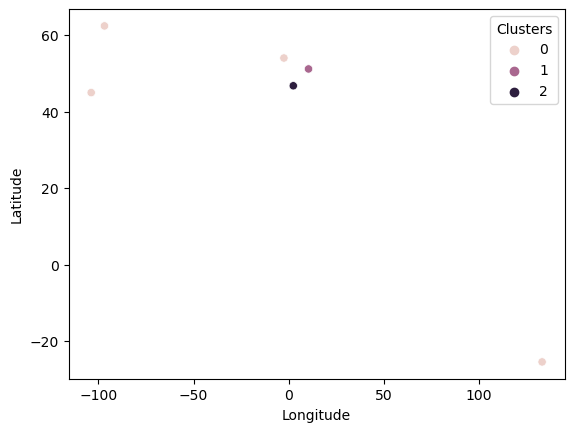

In [12]:
sns.scatterplot(data=country,x='Longitude',y='Latitude',hue='Clusters')

In [13]:
kmeans.fit(country[['Language']])

E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
kmeans.predict(country[['Language']])

array([1, 1, 2, 1, 0, 1])

In [16]:
country['Language'] = kmeans.predict(country[['Language']])

In [17]:
country

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,1,0
1,Canada,62.40,-96.80,1,0
2,France,46.75,2.40,2,2
3,UK,54.01,-2.53,1,0
4,Germany,51.15,10.40,0,1
5,Australia,-25.45,133.11,1,0


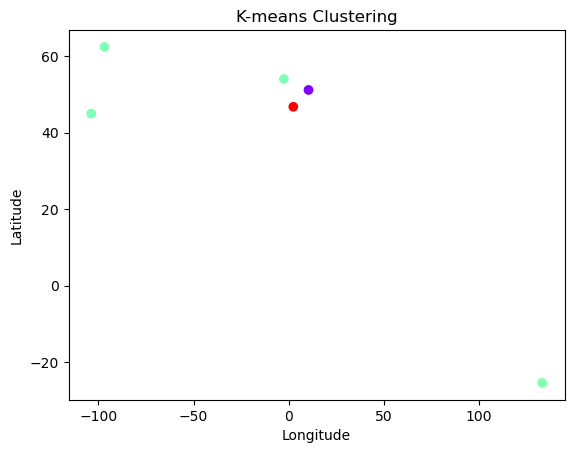

In [23]:
plt.scatter(country['Longitude'],country['Latitude'],c=country['Language'],cmap='rainbow')
plt.title('K-means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()